# [2. Accessing Text Corpora and Lexical Resources](https://www.nltk.org/book/ch02.html)

Run the cell below before running any other code.

In [1]:
import nltk

## 1 - Accessing Text Corpora

### 1.1 - Guterberg Corpus

In [ ]:
nltk.corpus.gutenberg.fileids()

In [ ]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')
type(emma)

In [ ]:
len(emma)

* notice that emma is a `nltk.corpus.reader.util.StreamBackedCorpusView` object
* in order to use the `.concordance` method on the `emma` text, we need to convert `emma` into a `nltk.text.Text` object, as shown below

In [ ]:
emma = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))
type(emma)

In [ ]:
emma.concordance("surprize")

In [ ]:
from nltk.corpus import gutenberg

In [ ]:
gutenberg.fileids()

In [ ]:
emma = gutenberg.words('austen-emma.txt')

In [ ]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set(w.lower() for w in gutenberg.words(fileid)))
    print(round(num_chars/num_words), round(num_words/num_sents), round(num_words/num_vocab), fileid)

#### Macbeth Sentences

In [ ]:
macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt')

In [ ]:
macbeth_sentences

In [ ]:
macbeth_sentences[1116]

In [ ]:
longest_len = max(len(s) for s in macbeth_sentences)

In [ ]:
[s for s in macbeth_sentences if len(s) == longest_len]

### 1.2 - Web and Chat Text

In [ ]:
from nltk.corpus import webtext

for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], '...')

In [ ]:
from nltk.corpus import nps_chat

chatroom = nps_chat.posts('10-19-20s_706posts.xml')
chatroom[123]

### 1.3 Brown Corpus

In [ ]:
from nltk.corpus import brown

In [ ]:
brown.categories()

In [ ]:
brown.words(categories='news')

In [ ]:
brown.words(fileids=['cg22'])

In [ ]:
brown.sents(categories=['news', 'editorial', 'reviews'])

#### Stylistics

In [ ]:
from nltk.corpus import brown

In [ ]:
news_text = brown.words(categories='news')

In [ ]:
fdist = nltk.FreqDist(w.lower() for w in news_text)

In [ ]:
modals = ['can', 'could', 'may', 'might', 'must', 'will']

In [ ]:
for m in modals:
    print(m + ':', fdist[m], end=' ')

**Your Turn:** Choose a different section of the Brown Corpus, and adapt the previous example to count a selection of wh words, such as what, when, where, who, and why.

#### CFD Sneak Peek

* CFD's will be explained in more detail in Section 2

In [ ]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))

genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfd.tabulate(conditions=genres, samples=modals)

### 1.4 - Reuters Corpus

In [ ]:
from nltk.corpus import reuters

In [ ]:
reuters.fileids()

In [ ]:
reuters.categories()

In [ ]:
reuters.categories('training/9865')

In [ ]:
reuters.categories(['training/9865', 'training/9880'])

In [ ]:
reuters.fileids('barley')

In [ ]:
reuters.fileids(['barley', 'corn'])

### 1.5 - Inaugural Address Corpus

In [ ]:
from nltk.corpus import inaugural

In [ ]:
inaugural.fileids()

In [ ]:
[fileid[:4] for fileid in inaugural.fileids()]

Pay attention to how this graph varies from the graph displayed in the book. NLTK's Inaugral Address Corpus is still updated, so data from United States presidents past 2005 are included in this graph.

* **note:** for this solution, I used matplotlib library functions to change the size of the graph
    * learn more about matplotlib here: [Intro to pyplot Tutorial](https://matplotlib.org/3.3.1/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py)
* CFD's will be explained in more detail in Section 2

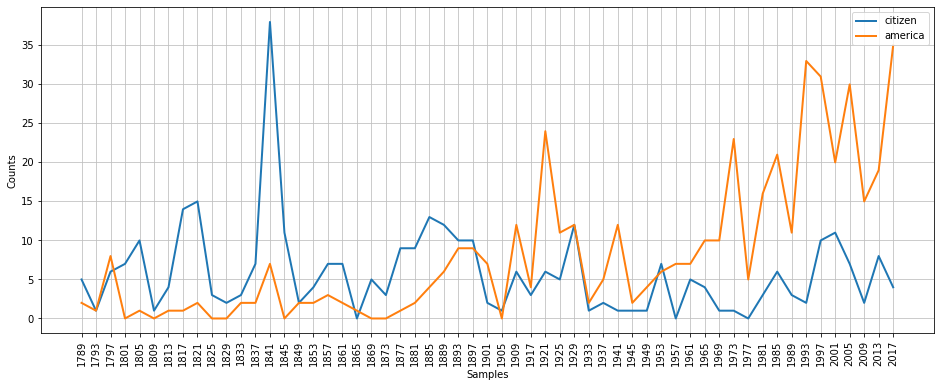

In [75]:
import matplotlib.pyplot as plt

cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target))

plt.figure(figsize=(16, 6)) 

cfd.plot()

### 1.7 - Corpora in Other Languages

In [ ]:
nltk.corpus.cess_esp.words()

In [ ]:
nltk.corpus.floresta.words()

In [ ]:
nltk.corpus.indian.words('hindi.pos')

In [ ]:
nltk.corpus.udhr.fileids()

In [ ]:
nltk.corpus.udhr.words('Javanese-Latin1')[11:]

* **note:** for this solution, I used matplotlib library functions to change the size of the graph
    * learn more about matplotlib here: [Intro to pyplot Tutorial](https://matplotlib.org/3.3.1/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py)
* CFD's will be explained in more detail in Section 2

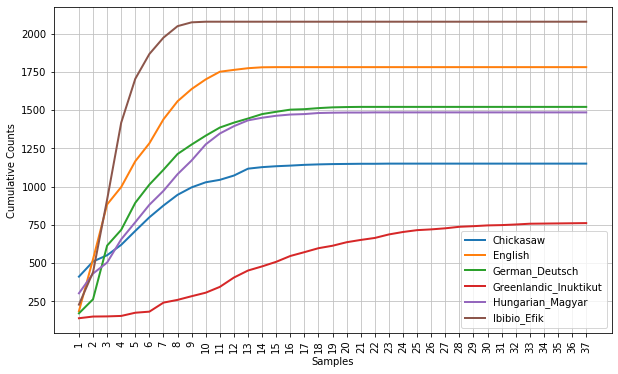

In [17]:
import matplotlib.pyplot as plt
from nltk.corpus import udhr

languages = ['Chickasaw', 'English', 'German_Deutsch', 'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))

plt.figure(figsize=(10, 6)) 

cfd.plot(cumulative=True)

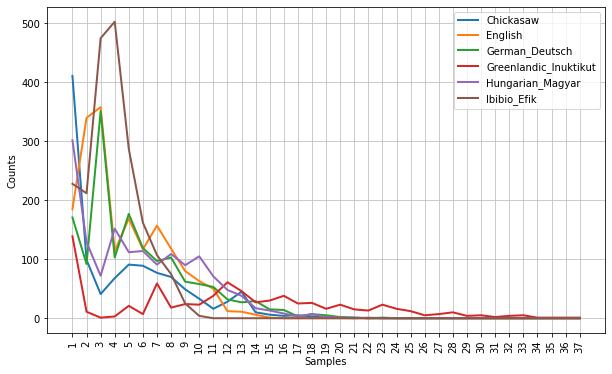

In [21]:
plt.figure(figsize=(10, 6)) 

cfd.plot()

In [12]:
def sumRange(num):
    return sum(range(num))

In [14]:
sumRange(20)

190

In [111]:
cfd.tabulate()

                        1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37 
            Chickasaw 411  99  41  68  91  89  77  70  49  33  16  28  45  10   6   4   5   3   2   1   1   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
              English 185 340 358 114 169 117 157 118  80  63  50  12  11   6   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
       German_Deutsch 171  92 351 103 177 119  97 103  62  58  53  32  27  29  15  14   3   7   5   2   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
Greenlandic_Inuktikut 139  11   1   3  21   7  59  18  24  23  38  61  46  27  30  38  25  26  16  23  15  13  23  16  12   5   7  10   4   5   2   4   5   1   1   1   1 
     Hungarian_Magyar 302 129  72 152 112 114  91 109  90 105  71  48  38  17  13   8   3   7   2   1   0   1   0   0   0   0   0   0   0   0   0

In [93]:
import pandas as pd
from nltk.corpus import udhr

languages = ['Chickasaw', 'English', 'German_Deutsch', 'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']

cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))

def plot_freq(lang):
    max_length = max([len(word) for word in udhr.words(lang + '-Latin1')])
    eng_freq_dist = {}

    for i in range(max_length + 1):
        eng_freq_dist[i] = cfd[lang].freq(i)

    ed = pd.Series(eng_freq_dist, name=lang)

    ed.cumsum().plot(legend=True, title='Cumulative Distribution of Word Lengths')

In [106]:
sorted([len(word) for word in udhr.words('English' + '-Latin1')])

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [101]:
lang

'Ibibio_Efik'

In [98]:
[lang for lang in languages]

['Chickasaw',
 'English',
 'German_Deutsch',
 'Greenlandic_Inuktikut',
 'Hungarian_Magyar',
 'Ibibio_Efik']

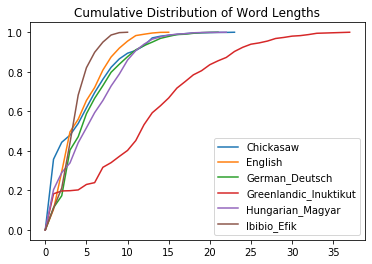

In [95]:
for lang in languages:
    plot_freq(lang)

## 2

## 3

## 4

## 5

## Your Turn Solutions

### 1.3

**Your Turn:** Choose a different section of the Brown Corpus, and adapt the previous example to count a selection of wh words, such as what, when, where, who, and why.

In [ ]:
from nltk.corpus import brown

humor_text = brown.words(categories='humor')
humor_fdist = nltk.FreqDist(w.lower() for w in humor_text)
wh = ['what', 'when', 'where', 'who', 'why']

for w in wh:
    print(w + ':', fdist[m], end=' ')